Question 2.1

In [ ]:
import pandas
import numpy as np
import math
import matplotlib.pyplot as plt

# read the csv file and load into pandas dataframe
df = pandas.read_csv("/content/drive/MyDrive/Logistic Regression/train.csv",header=None)
# convert dataframe to numpy matrix
data = df.to_numpy()

def enumerate(data, df, i):
  ''' 
  Function to encode categorical fields into discrete numbers
  '''
  col = data[:,i] # extract the column
  categories = np.unique(col) # get unique values of in the field
  labels={}
  l=0
  for c in categories:
    labels[c]=l
    l+=1
  df[i].replace(labels, inplace=True) # replace string values by integer labels

def normalize(df):
  '''
  Function to normalise the data using the L2 norm
  '''
  data = df.to_numpy()
  data = data.astype(float)
  n = data.shape[0]
  m = data.shape[1]
  for i in range(m):
    sm =  np.sqrt(np.sum(np.square(data[:,i])))
    for j in range(n):
      data[j][i] = data[j][i]/sm
  return data

# extract columns from dataframe which have object datatype
categ_cols = df.select_dtypes(include=['object']).copy()

# enumerate categorical columns
for i in categ_cols:
  enumerate(data, df, i)

# normalize the data
data = normalize(df)

In [ ]:
def sigmoid(z):
  '''
  Function to calculate sigmoid
  '''
  return 1/(1+np.exp(-z))

def train_wts(X,Y,epochs,learn_rt,reg_coeff,reg="L2"):
  '''
  Gradient descent algorithm to learn Weights
  '''
  n = X.shape[0]
  m = X.shape[1]
  W = np.random.rand(m)
  b = 0
  loss = []
  iters = []
  acc = []
  for i in range(epochs):
    p = sigmoid(np.dot(X,W)+b)
    err = (p-Y)
    if reg=="L1":
      dW = (1 / n) * (np.dot(X.T, err) + reg_coeff)
      db = (np.sum(err)+reg_coeff)/n
      ls = -(1 / n) * (np.sum(Y * np.log(p) + (1 - Y) * np.log(1 - p)) + reg_coeff*np.sum(W))
    else:
      dW = (1 / n) * (np.dot(X.T, err) + (reg_coeff*W))
      db = (np.sum(err)+reg_coeff*np.sum(W))/n
      ls = -(1 / n) * (np.sum(Y * np.log(p) + (1 - Y) * np.log(1 - p)) + reg_coeff*np.sum(np.square(W)))
    W = W - (learn_rt*dW)
    b = b - (learn_rt*db)
    pr = predict(X,W,b)
    ac = accuracy(Y,pr)
    loss.append(ls)
    iters.append(i+1)
    acc.append(ac)
  
  plt.figure(figsize=(10,5))
  plt.plot(iters, loss)
  plt.xlabel('iterations')
  plt.ylabel('loss')
  plt.title('loss vs iterations')
  plt.show()
  plt.figure(figsize=(10,5))
  plt.plot(iters, acc)
  plt.xlabel('iterations')
  plt.ylabel('accuracy')
  plt.title('accuracy vs iterations')
  plt.show()
  return W,b,iters,loss,acc

def predict(X,W,b):
  '''
  Function to predict labels given the features and weights
  '''
  Z = sigmoid(np.dot(X,W)+b)
  Ans = np.zeros(len(Z))
  for i in range(len(Z)):
    if Z[i]>0.5:
      Ans[i]=1     
  return Ans

def Logistic_L1(X,Y,epochs,learn_rt,reg_coeff):
  '''
  Logistic regression with L1 regularisation 
  '''
  W,b,iters,loss,acc = train_wts(X,Y,epochs,learn_rt,reg_coeff,reg="L1")
  return W,b,iters,loss,acc

def Logistic_L2(X,Y,epochs,learn_rt,reg_coeff):
  '''
  Logistic regression with L2 regularisation
  '''
  W,b,iters,loss,acc = train_wts(X,Y,epochs,learn_rt,reg_coeff,reg="L2")
  return W,b,iters,loss,acc

def accuracy(Y, pred):
  '''
  Function to calculate accuracy of predicted labels
  '''
  correct=0
  for i in range(len(Y)):
    if Y[i] == pred[i]:
      correct+=1
  return correct/len(Y)

# Shuffle and split the data into train and validation
n = data.shape[0]
np.random.shuffle(data)
split = int(0.8*n)
train = data[0:split,:]
val = data[split:,:]

X_train = train[:,0:-1]
Y_train = train[:,-1]

X_val = val[:,0:-1]
Y_val = val[:,-1]

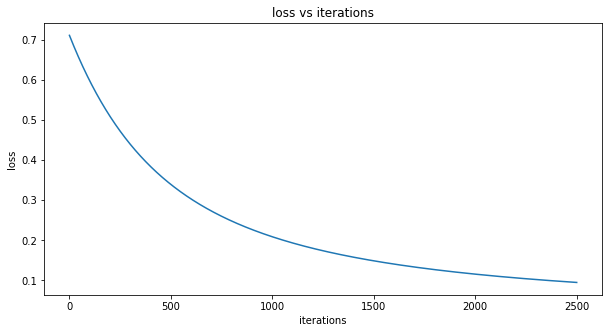

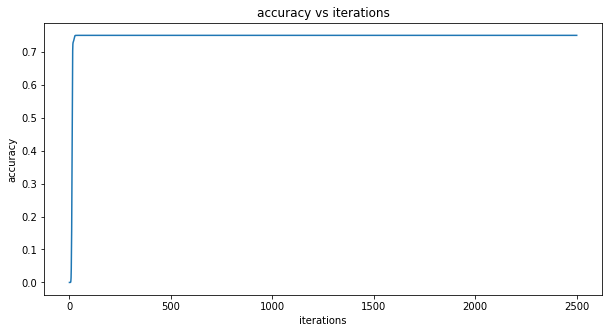

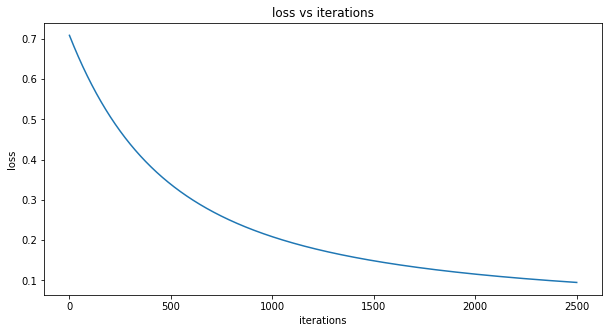

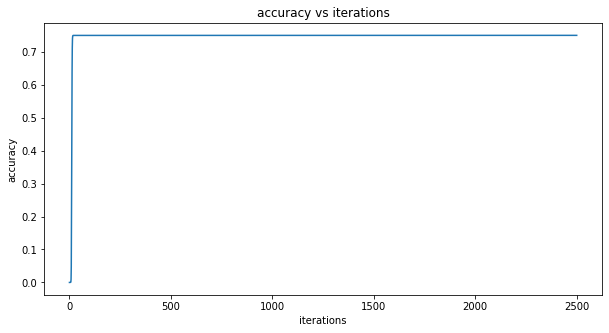

In [ ]:
# Fit the weights using the train data
W_L1, b_L1, iter1, loss1, acc1 = Logistic_L1(X_train,Y_train,2500,0.005,1)
W_L2, b_L2, iter2, loss2, acc2 = Logistic_L2(X_train,Y_train,2500,0.005,1)

In [ ]:
# Predict train labels
train_pred1 = predict(X_train, W_L1, b_L1)
train_pred2 = predict(X_train, W_L2, b_L2)
print("L1 train acc:",accuracy(Y_train,train_pred1))
print("L2 train acc:",accuracy(Y_train,train_pred2))

# Predict validation labels
val_pred1 = predict(X_val, W_L1, b_L1)
val_pred2 = predict(X_val, W_L2, b_L2)
print("L1 val acc:",accuracy(Y_val,val_pred1))
print("L2 val acc:",accuracy(Y_val,val_pred2))

# Read the test data
test_df = pandas.read_csv("/content/drive/MyDrive/Logistic Regression/test.csv",header=None)
test_data = test_df.to_numpy()

categ_cols = test_df.select_dtypes(include=['object']).copy()

for i in categ_cols:
  enumerate(test_data, test_df, i)

test = normalize(test_df)

X_test = test[:,0:-1]
Y_test = test[:,-1]

# Predict the labels for test data
test_pred1 = predict(X_test, W_L1, b_L1)
test_pred2 = predict(X_test, W_L2, b_L2)
print("L1 test acc:",accuracy(Y_test,test_pred1))
print("L2 test acc:",accuracy(Y_test,test_pred2))

L1 train acc: 0.7494715902026607
L2 train acc: 0.7494715902026607
L1 val acc: 0.7575004143875352
L2 val acc: 0.7575004143875352
L1 test acc: 0.7543160690571049
L2 test acc: 0.7543160690571049
